In [92]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


# 1. Importing Libaraies

In [93]:
# To ignore the warnings
import warnings
warnings.simplefilter("ignore")

# useful libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for selecting features
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

# Libaraies for Model prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# 2. Data Description

In [94]:
# Read Raw Dataset
tele=pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [95]:
# Display the first few rows of the dataset
tele.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Columns description**:
* customerID: Customer ID
* gender: Whether the customer is a male or a female
* SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
* Partner: Whether the customer has a partner or not (Yes, No)
* Dependents: Whether the customer has dependents or not (Yes, No)
* tenure: Number of months the customer has stayed with the company
* PhoneService: Whether the customer has a phone service or not (Yes, No)
* MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
* InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
* OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
* DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
* TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
* StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
* StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
* Contract: The contract term of the customer (Month-to-month, One year, Two year)
* PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
* PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges: The amount charged to the customer monthly
* TotalCharges: The total amount charged to the customer
* Churn: Whether the customer churned or not (Yes or No)

In [96]:
# shape of the dataset
tele.shape 

(7043, 21)

In [97]:
# Get basic statistics
tele.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [98]:
# Get basic information about the dataset
tele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [99]:
# checking all null values
tele.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# 3. Data Cleaning

### 3.1. Convert columns with numeric data stored as strings to numeric types

In [100]:
# Convert TotalCharges to numeric, coercing errors to NaN
tele['TotalCharges'] = pd.to_numeric(tele['TotalCharges'], errors='coerce')

# Check for any missing values in TotalCharges
missing_total_charges = tele['TotalCharges'].isnull().sum()
missing_total_charges

11

In [101]:
tele.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### 3.2. Handling Missing Data

In [102]:
# Impute missing TotalCharges with the median
tele['TotalCharges'].fillna(tele['TotalCharges'].median(), inplace=True)

In [103]:
# Verify there are no more missing values in TotalCharges
tele['TotalCharges'].isnull().sum()

0

### 3.3. Outliers

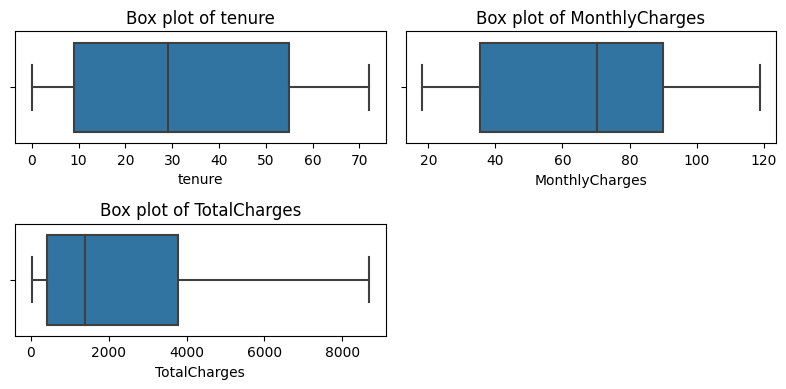

Outliers in tenure:
Series([], Name: tenure, dtype: int64)
Outliers in MonthlyCharges:
Series([], Name: MonthlyCharges, dtype: float64)
Outliers in TotalCharges:
Series([], Name: TotalCharges, dtype: float64)


In [104]:
# columns to check for outliers
columns_to_check = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Visualizing outliers using box plots
plt.figure(figsize=(8, 4))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=tele, x=column)
    plt.title(f'Box plot of {column}')

plt.tight_layout()
plt.show()

# Calculating IQR and identifying outliers
for column in columns_to_check:
    Q1 = tele[column].quantile(0.25)
    Q3 = tele[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = tele[(tele[column] < lower_bound) | (tele[column] > upper_bound)]
    print(f'Outliers in {column}:')
    print(outliers[column])

From the Boxplot we can see that there are no outliers in the dataset

# 4. Data Exploration
### 4.1. Initial summary statistics

In [105]:
# Summary statistics for continuous variables
continuous_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

print('Summary statistics for continuous variables:')
print(tele[continuous_columns].describe())

Summary statistics for continuous variables:
            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2281.916928
std      24.559481       30.090047   2265.270398
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    402.225000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000


In [106]:
# Percentage of churn rate
tele['Churn'].value_counts()[1]/tele['Churn'].shape[0]*100

26.536987079369588

**Insight**: From the distribution, we can see that the numericals are increasing gradually. And 26.5% of the customers are turned to be Churn

### 4.2. Univariate Analysis

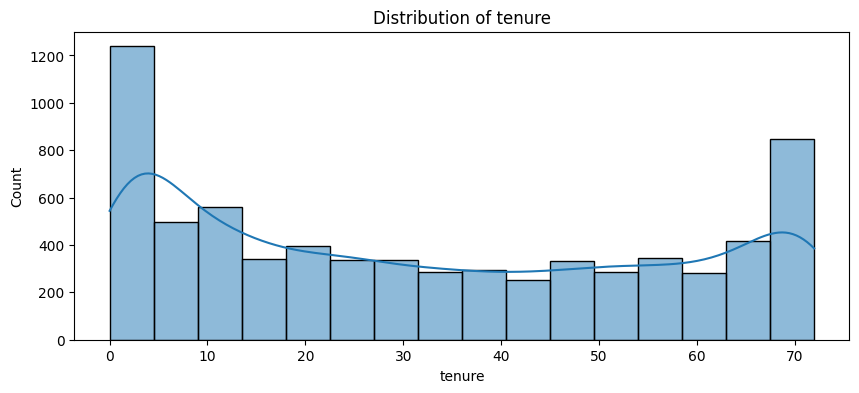

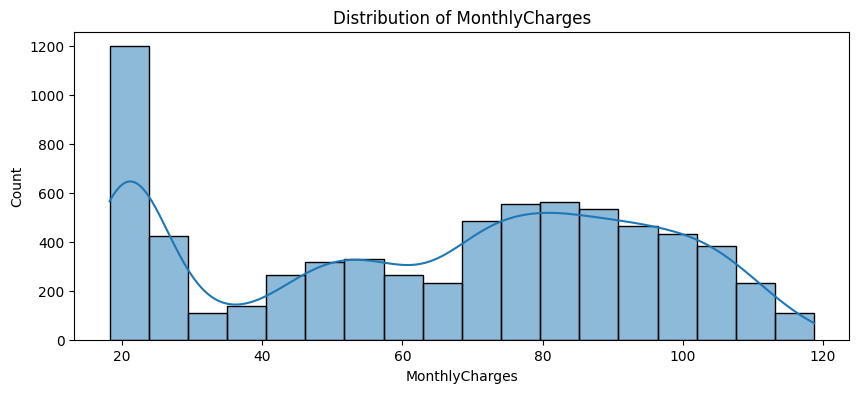

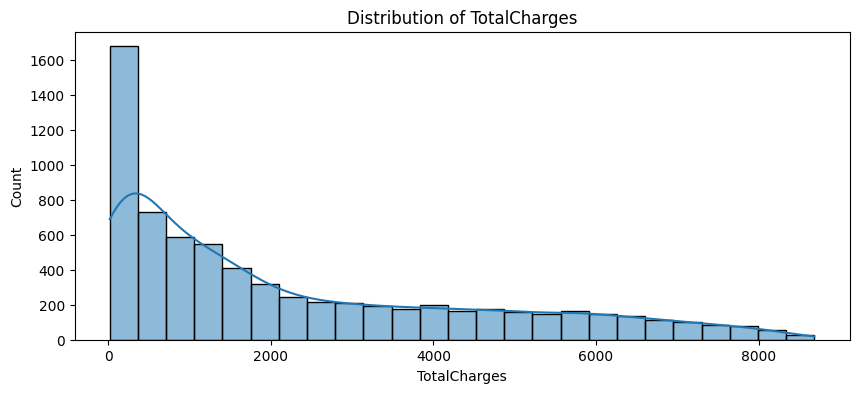

In [107]:
# Numerical variables
numerical_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Plot histograms for numerical variables
for var in numerical_vars:
    plt.figure(figsize=(10, 4))
    sns.histplot(tele[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()


**Insight**: 
1. Tenure: Most of the data is at range 0-10 and 65-70
2. MonthlyCharges: Most of the customers are likely to be at 20-40 Monthly Charges
3. TOtalCharges: Most of the customers in range 0-2000 which shows that customers like to stay at lower charges

### 4.3. Bivariate Analysis
#### Analysis between Two Variables

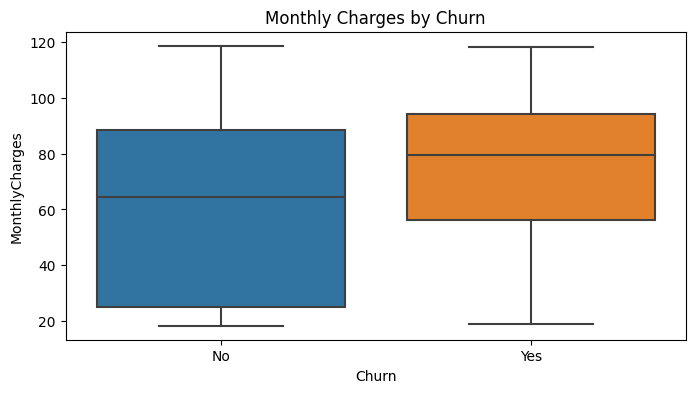

In [108]:
# Box plot of MonthlyCharges vs Churn
plt.figure(figsize=(8, 4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=tele)
plt.title('Monthly Charges by Churn')
plt.show()

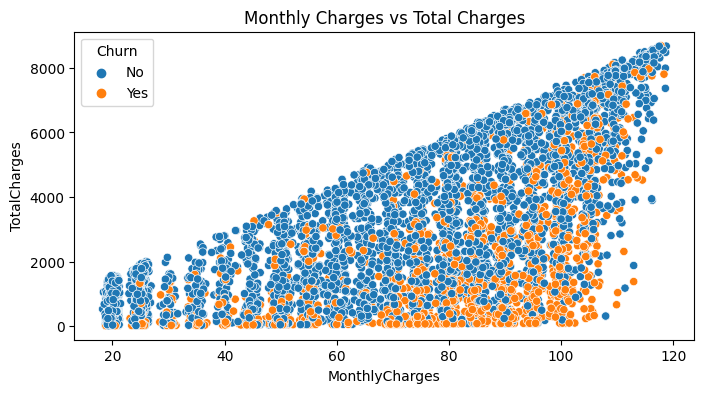

In [109]:
# Scatter plot of MonthlyCharges vs TotalCharges
plt.figure(figsize=(8, 4))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=tele)
plt.title('Monthly Charges vs Total Charges')
plt.show()

**Insights**: From the graphs above, we can say that customer likely to churn are the one who are having high Monthly Charges

### 4.4. Multivariate analysis

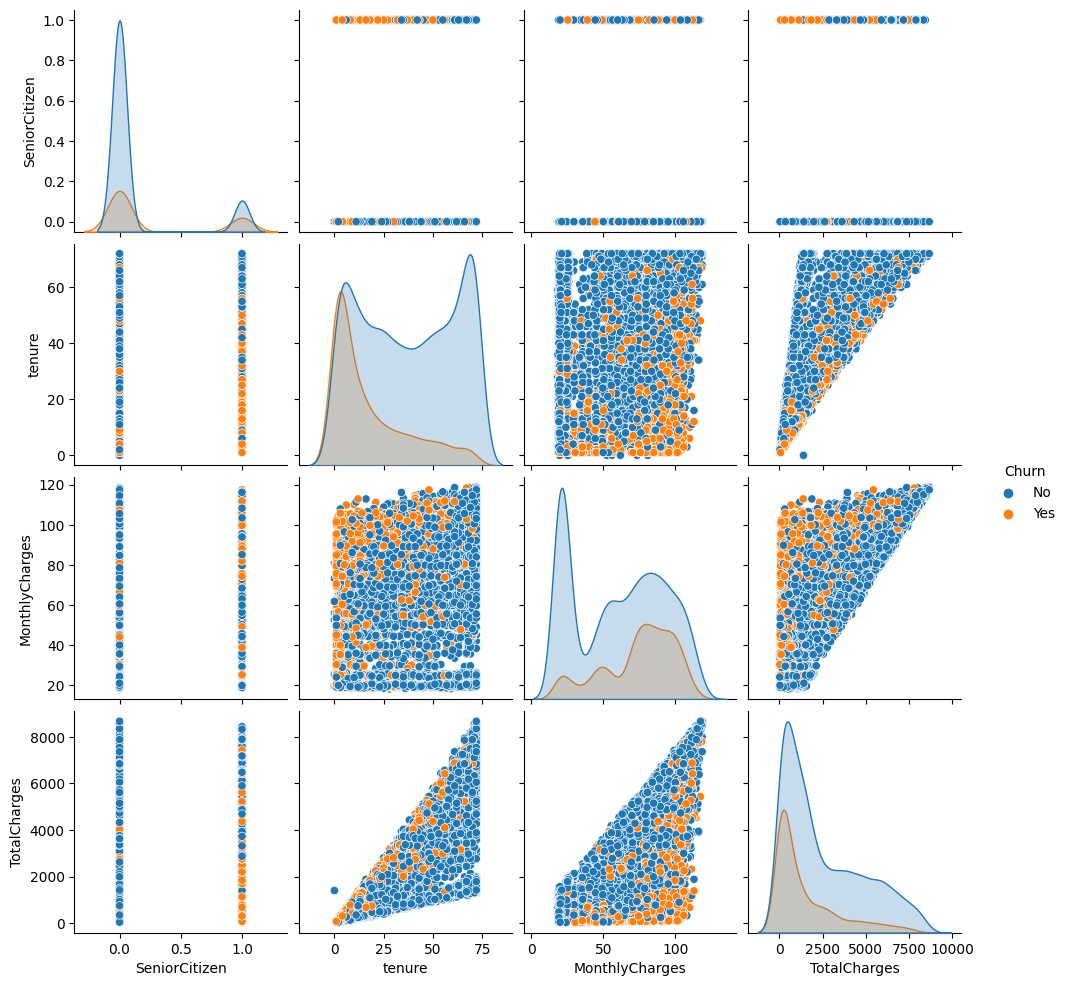

In [110]:
# Multivariate analysis with pair plot
sns.pairplot(tele, hue='Churn')
plt.show()

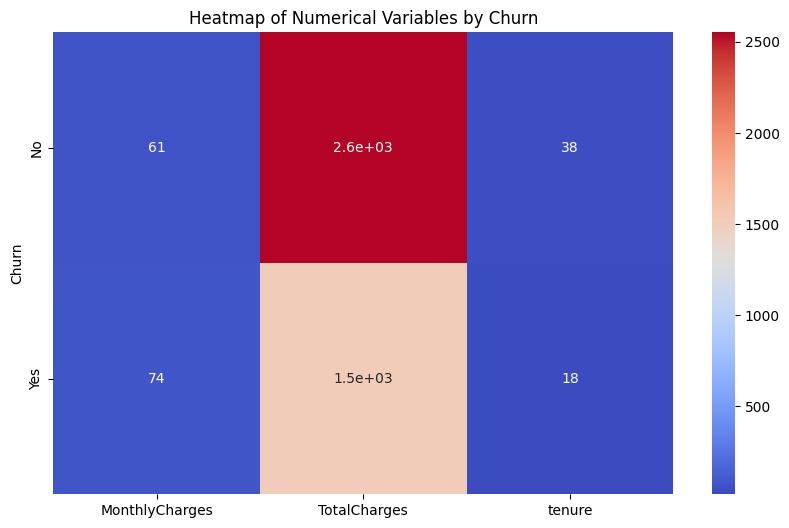

In [111]:
# Heatmap for categorical variables with respect to churn
pivot_table = tele.pivot_table(index='Churn', values=numerical_vars, aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Heatmap of Numerical Variables by Churn')
plt.show()

# 5. Feature Selection
### 5.1. Conversion of data and datatypes
#### 5.1.1. Converting columns which are binary variables (Yes/No) to 0/1
**Binary Variables**: This are the columns where the data in this are in form binary i.e yes or no. So inorder to make this data machine readable, we need to convert this into the form of 1 or 0

In [112]:
# columns which are binary variables
colList =  ['Churn', 'Dependents', 'Partner', 'PaperlessBilling', 'PhoneService']

# function to convert to 1/0's
def convertToBinary(col):
    return col.map({'Yes': 1, "No": 0})

# updating the values in the tele dataframe
tele[colList] = tele[colList].apply(convertToBinary)

#### 5.1.2. Convert categorical columns to numerical columns

In [113]:
# Converting categorical columns to numerical values
categorical_cols = [
    'gender', 'MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaymentMethod']

# Using get_dummies to convert categorical variables to dummy/indicator variables
tele = pd.get_dummies(tele, columns=categorical_cols, dtype=int)

In [114]:
# Display the first few rows of the transformed dataset
tele.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


### 5.2. Drop unnecessary columns

In [115]:
# dropping the unwanted variables/columns
tele = tele.drop(columns=[ 'customerID', 'MultipleLines_No phone service', 'OnlineSecurity_No internet service', 'DeviceProtection_No internet service', 
                          'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service'])

### 5.3. Correlation Analysis

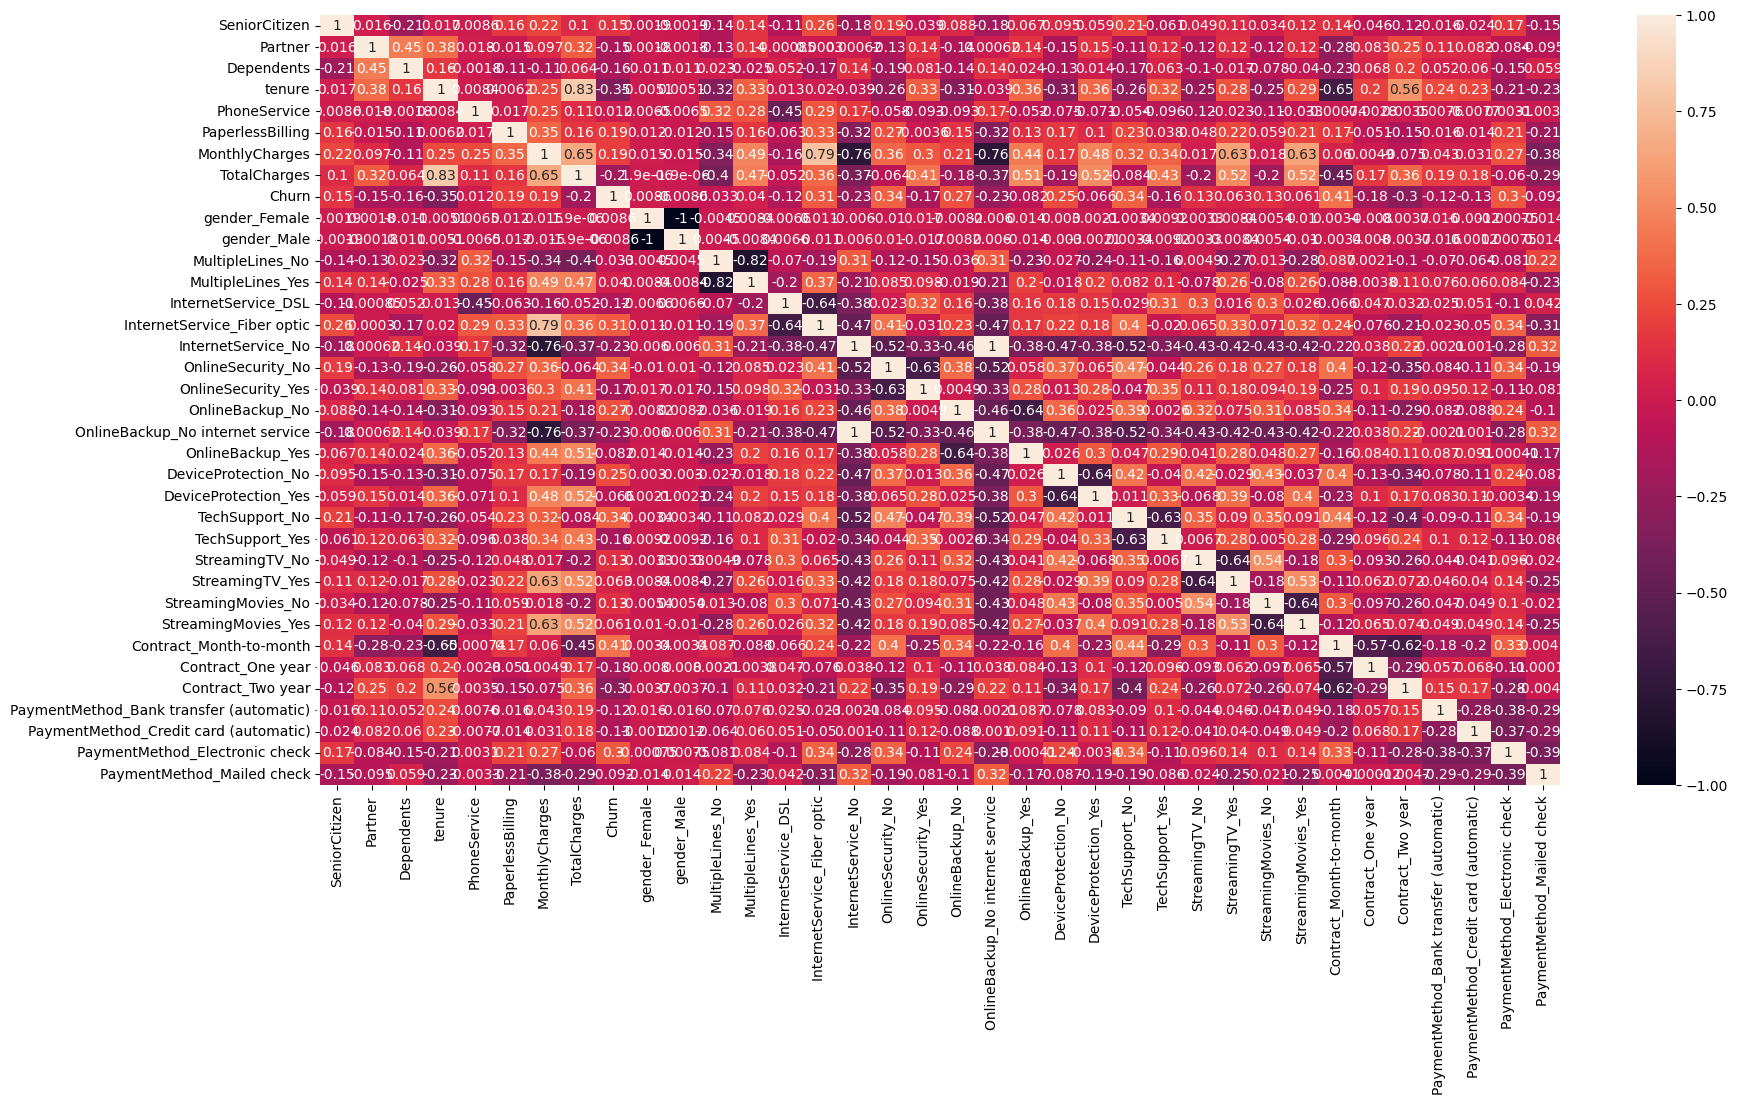

In [116]:
# Size of the figure
plt.figure(figsize = (20,10))        
sns.heatmap(tele.corr(),annot = True)
plt.show()

#### Removing all the variables which are highly correlated

In [117]:
tele = tele.drop(columns= ['gender_Female', 'Contract_Month-to-month','InternetService_Fiber optic','MultipleLines_No','OnlineSecurity_No',
                           'OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No',
                          'OnlineBackup_No internet service'])

### 5.2. Feature Scaling

In [118]:
# Standarding the continuous values
scaler = StandardScaler()

tele[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(tele[['tenure','MonthlyCharges','TotalCharges']])

tele[['tenure','MonthlyCharges','TotalCharges']].head()

,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.994242
1,0.066327,-0.259629,-0.173244
2,-1.236724,-0.362660,-0.959674
3,0.514251,-0.746535,-0.194766
4,-1.236724,0.197365,-0.940470


# 6. Train-Test split

In [119]:
# Storing the input variables in X
X = tele.drop(['Churn'], axis=1)

In [120]:
X.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Male,MultipleLines_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,-1.277445,0,1,-1.160323,-0.994242,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0.066327,1,0,-0.259629,-0.173244,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,-1.236724,1,1,-0.362660,-0.959674,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0.514251,0,0,-0.746535,-0.194766,1,0,...,1,1,0,0,1,0,1,0,0,0
4,0,0,0,-1.236724,1,1,0.197365,-0.940470,0,0,...,0,0,0,0,0,0,0,0,1,0


In [121]:
# storing output variable to y
y = tele['Churn']

In [122]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [123]:
# Splitting the data in form of train(0.8) and test(0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [124]:
X_train.shape, X_test.shape

((5634, 24), (1409, 24))

In [125]:
y_train.shape, y_test.shape

((5634,), (1409,))

# 7. Models Building

### 7.1. Logistic Regression

In [126]:
# loading LogisticRegression model
lr = LogisticRegression()

In [127]:
# running RFE with letting the model to find the no.of variables as output
rfe = RFE(estimator=lr)
rfe = rfe.fit(X_train, y_train)

In [128]:
# to view all the columns which are selected
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('SeniorCitizen', False, 3),
 ('Partner', False, 12),
 ('Dependents', False, 5),
 ('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('gender_Male', False, 13),
 ('MultipleLines_Yes', False, 4),
 ('InternetService_DSL', True, 1),
 ('InternetService_No', True, 1),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_Yes', False, 2),
 ('DeviceProtection_Yes', False, 6),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', False, 8),
 ('StreamingMovies_Yes', False, 7),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Bank transfer (automatic)', False, 11),
 ('PaymentMethod_Credit card (automatic)', False, 10),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', False, 9)]

#### 7.1.1. LR model training

In [129]:
# Selecting only the features that RFE has deemed important
selected_columns_lr = X_train.columns[rfe.support_]
len(selected_columns_lr)

12

In [130]:
# Training the model with the selected features
lr.fit(X_train[selected_columns_lr], y_train)

LogisticRegression()

In [131]:
# Making predictions on the training set
y_train_pred_lr = lr.predict(X_train[selected_columns_lr])

In [132]:
# Making predictions on the test set
y_test_pred_lr = lr.predict(X_test[selected_columns_lr])

In [133]:
# Evaluating the model
train_accuracy = accuracy_score(y_train, y_train_pred_lr)
test_accuracy = accuracy_score(y_test, y_test_pred_lr)
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.8052893148739794
Test Accuracy: 0.7885024840312278


#### 7.1.2. Model Evaluation

In [134]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred_lr)
precision = precision_score(y_test, y_test_pred_lr)
recall = recall_score(y_test, y_test_pred_lr)
f1 = f1_score(y_test, y_test_pred_lr)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.7885024840312278
Precision: 0.6295180722891566
Recall: 0.5442708333333334
F1-Score: 0.5837988826815642


In [135]:
# Detailed classification report
print(classification_report(y_test, y_test_pred_lr))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1025
           1       0.63      0.54      0.58       384

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409



### 7.2. Random Forest Classifier

In [136]:
# Initialize the model
rfc = RandomForestClassifier()

# RFE feature selection
rfe = RFE(rfc, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [137]:
# to view all the columns which are selected
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('SeniorCitizen', True, 1),
 ('Partner', True, 1),
 ('Dependents', False, 4),
 ('tenure', True, 1),
 ('PhoneService', False, 10),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('gender_Male', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('InternetService_DSL', False, 2),
 ('InternetService_No', True, 1),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_Yes', True, 1),
 ('DeviceProtection_Yes', False, 3),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', False, 6),
 ('StreamingMovies_Yes', False, 5),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Bank transfer (automatic)', False, 7),
 ('PaymentMethod_Credit card (automatic)', False, 8),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', False, 9)]

In [138]:
# Display selected features
selected_columns_rfc = X_train.columns[rfe.support_]
print("Selected Features:", selected_columns_rfc)

Selected Features: Index(['SeniorCitizen', 'Partner', 'tenure', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'gender_Male', 'MultipleLines_Yes',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'TechSupport_Yes', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check'],
      dtype='object')


#### 7.2.1. RFC Model Training

In [139]:
# Train the model
rfc.fit(X_train[selected_columns_rfc], y_train)

RandomForestClassifier()

In [140]:
# Making predictions on the training set
y_train_pred_rfc = rfc.predict(X_train[selected_columns_rfc])

In [141]:
# Making predictions on the test set
y_test_pred_rfc = rfc.predict(X_test[selected_columns_rfc])

In [142]:
# Evaluating the model
train_accuracy = accuracy_score(y_train, y_train_pred_rfc)
test_accuracy = accuracy_score(y_test, y_test_pred_rfc)
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.9971600993965212
Test Accuracy: 0.7856635911994322


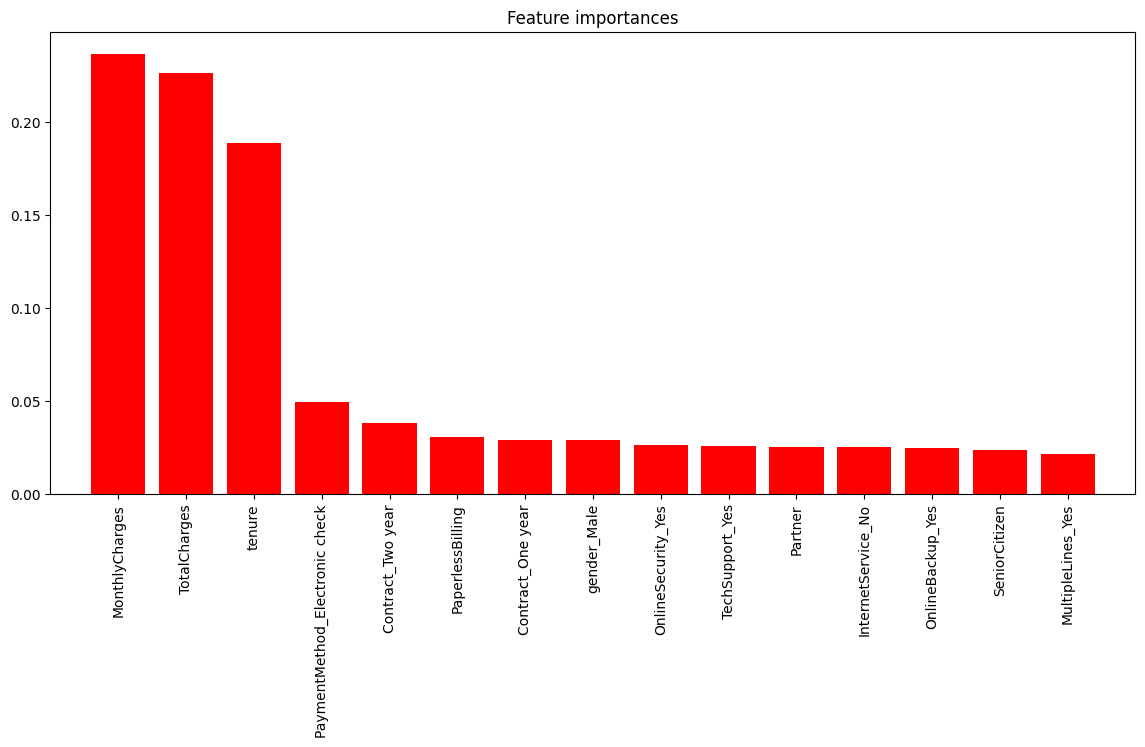

In [143]:
# Get feature importances
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure(figsize=(14, 6))
plt.title("Feature importances")
plt.bar(range(X_train[selected_columns_rfc].shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train[selected_columns_rfc].shape[1]), [X_train[selected_columns_rfc].columns[i] for i in indices], rotation=90)
plt.xlim([-1, X_train[selected_columns_rfc].shape[1]])
plt.show()

#### 7.2.2. RFC model evaluate

In [144]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred_rfc)
precision = precision_score(y_test, y_test_pred_rfc)
recall = recall_score(y_test, y_test_pred_rfc)
f1 = f1_score(y_test, y_test_pred_rfc)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.7856635911994322
Precision: 0.6331168831168831
Recall: 0.5078125
F1-Score: 0.5635838150289018


In [145]:
# Detailed classification report
print(classification_report(y_test, y_test_pred_rfc))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1025
           1       0.63      0.51      0.56       384

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



### 7.3.  Gradient Boosting

In [146]:
# Initialize the model
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# RFE feature selection
rfe = RFE(gbc, n_features_to_select=13)
rfe = rfe.fit(X_train, y_train)

In [147]:
# Display selected features
selected_columns_gbc = X_train.columns[rfe.support_]
print("Selected Features:", selected_columns_gbc)

Selected Features: Index(['SeniorCitizen', 'tenure', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_No', 'OnlineSecurity_Yes', 'TechSupport_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check'],
      dtype='object')


#### 7.3.1. GBC model training

In [148]:
# Initialize and train the Gradient Boosting classifier
gbc.fit(X_train[selected_columns_gbc], y_train)

GradientBoostingClassifier(random_state=42)

In [149]:
# Making predictions on the training set
y_train_pred_gbc = gbc.predict(X_train[selected_columns_gbc])

In [150]:
# Making predictions on the test set
y_test_pred_gbc = gbc.predict(X_test[selected_columns_gbc])

In [151]:
# Evaluating the model
train_accuracy_gbc = accuracy_score(y_train, y_train_pred_gbc)
test_accuracy_gbc = accuracy_score(y_test, y_test_pred_gbc)
print(f"Training Accuracy: {train_accuracy_gbc}")
print(f"Test Accuracy: {test_accuracy_gbc}")

Training Accuracy: 0.8272985445509408
Test Accuracy: 0.7877927608232789


#### 7.3.2 GBC Model Evaluation

In [152]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred_gbc)
precision = precision_score(y_test, y_test_pred_gbc)
recall = recall_score(y_test, y_test_pred_gbc)
f1 = f1_score(y_test, y_test_pred_gbc)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.7877927608232789
Precision: 0.632398753894081
Recall: 0.5286458333333334
F1-Score: 0.5758865248226951


In [153]:
# Detailed classification report
print(classification_report(y_test, y_test_pred_gbc))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1025
           1       0.63      0.53      0.58       384

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409

